In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report,confusion_matrix,precision_score,roc_curve
import seaborn as sns
from sklearn.utils import shuffle
# from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics



ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# Load the dataset using pandas
file_path = '/content/drive/My Drive/dataset.csv'

df = pd.read_csv(file_path, on_bad_lines='skip')
df = shuffle(df,random_state=42)
print(df.head())

                  Disease        Symptom_1            Symptom_2  \
373                  Acne        skin_rash           blackheads   
4916                 Acne        skin_rash   pus_filled_pimples   
1550      Hyperthyroidism          fatigue          mood_swings   
3081                 AIDS   muscle_wasting    patches_in_throat   
3857  Chronic cholestasis          itching             vomiting   

            Symptom_3                Symptom_4          Symptom_5  \
373          scurring                      NaN                NaN   
4916       blackheads                 scurring                NaN   
1550      weight_loss             restlessness           sweating   
3081       high_fever   extra_marital_contacts                NaN   
3857   yellowish_skin                   nausea   loss_of_appetite   

            Symptom_6           Symptom_7          Symptom_8  \
373               NaN                 NaN                NaN   
4916              NaN                 NaN             

Removing hyphen from the strings

In [ ]:
for col in df.columns:
    df[col] = df[col].str.replace('_',' ')

df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Acne,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,stomach bleeding,chest pain,chest pain,loss of smell,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [ ]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


In [ ]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,0,0,0,0,0,0
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Load the dataset using pandas
file_path = '/content/drive/My Drive/Symptom-severity.csv'

df1 = pd.read_csv(file_path, on_bad_lines='skip')

print(df1.head())

                Symptom  weight
0               itching       1
1             skin_rash       3
2  nodal_skin_eruptions       4
3   continuous_sneezing       4
4             shivering       5


In [ ]:
x=df1['Symptom']
x

,Symptom
0,itching
1,skin_rash
2,nodal_skin_eruptions
3,continuous_sneezing
4,shivering
...,...
128,inflammatory_nails
129,blister
130,red_sore_around_nose
131,yellow_crust_ooze


In [ ]:
dfx=pd.DataFrame()
dfx["Disease"]=df["Disease"]
dfx[x]=0
for index, row in df.iterrows():
    for symptom in df.columns[1:]:
        if row[symptom] != 0:
            dfx.loc[index, row[symptom]] = 1
dfx = dfx.fillna(0)
dfx[dfx.columns[1:]]=dfx[dfx.columns[1:]].astype('int')

<ipython-input-17-f4fb46ae0b48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfx[x]=0
<ipython-input-17-f4fb46ae0b48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfx[x]=0
<ipython-input-17-f4fb46ae0b48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfx[x]=0
<ipython-input-17-f4fb46ae0b48>

In [ ]:
dfx.columns = dfx.columns.str.strip()

In [ ]:
dfx

,Disease,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,yellow crust ooze,ulcers on tongue,spotting urination,pain behind the eyes,red spots over body,internal itching,movement stiffness,knee pain,hip joint pain,dischromic patches
0,Acne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Acne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AIDS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,Psoriasis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,Peptic ulcer diseae,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4917,Dengue,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4918,Fungal infection,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
dfx.drop(dfx.columns[-4:], axis=1, inplace=True)
dfx

,Disease,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,weakness of one body side,altered sensorium,nodal skin eruptions,red sore around nose,yellow crust ooze,ulcers on tongue,spotting urination,pain behind the eyes,red spots over body,internal itching
0,Acne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Acne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AIDS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,Psoriasis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,Peptic ulcer diseae,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4917,Dengue,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4918,Fungal infection,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
columns_to_drop = ['foul_smell_ofurine', 'dischromic_patches', 'spotting_urination']
dfx = dfx.drop(columns=columns_to_drop)

In [ ]:
dfx[dfx.columns[1:]].sum(axis=0).sort_values()

,0
swelling_joints,0
muscle_weakness,0
hip_joint_pain,0
knee_pain,0
slurred_speech,0
...,...
nausea,1146
loss of appetite,1152
high fever,1362
vomiting,1914


In [ ]:
y=df['Disease'].unique()
y

array(['Acne', 'Hyperthyroidism', 'AIDS', 'Chronic cholestasis',
       'Hypertension', 'Hypoglycemia', 'Arthritis', 'Hepatitis B',
       'Migraine', 'Urinary tract infection', 'Diabetes', 'Hepatitis D',
       'Psoriasis', 'Alcoholic hepatitis', 'Dimorphic hemmorhoids(piles)',
       'Hepatitis E', 'Cervical spondylosis', 'Bronchial Asthma',
       'hepatitis A', 'Allergy', 'Hepatitis C', 'Pneumonia',
       'Hypothyroidism', 'Gastroenteritis', 'Varicose veins', 'Jaundice',
       'Drug Reaction', '(vertigo) Paroymsal  Positional Vertigo',
       'Heart attack', 'Tuberculosis', 'Typhoid', 'Common Cold',
       'Peptic ulcer diseae', 'Paralysis (brain hemorrhage)',
       'Fungal infection', 'Impetigo', 'GERD', 'Dengue', 'Malaria',
       'Chicken pox', 'Osteoarthristis'], dtype=object)

In [ ]:
data = dfx.iloc[:,1:].values
labels = dfx['Disease'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size = 0.7,random_state=42)
x_train, x_val, y_train,y_val=train_test_split(data,labels,test_size=0.3,random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, x_val.shape,y_val.shape)

(3444, 222) (1476, 222) (3444,) (1476,) (1476, 222) (1476,)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val=le.transform(y_val)

In [ ]:
y=le.classes_
y

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [ ]:
!pip install tensorflow


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import f1_score, roc_auc_score

# Ensure x_train, x_test, x_val are NumPy arrays
input_dim = x_train.shape[1]

def create_advanced_mlp(input_dim):
    model = keras.Sequential([
        layers.Dense(256, input_dim=input_dim, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(y_train.max() + 1, activation='softmax')  # Adjust output for the number of classes
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Training and evaluation loop with validation
model = create_advanced_mlp(input_dim)
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_val, y_val), verbose=1)

# Evaluate on test set
test_predictions = np.argmax(model.predict(x_test), axis=1)
test_f1 = f1_score(y_test, test_predictions, average='weighted')
test_roc = roc_auc_score(y_test, model.predict(x_test), multi_class='ovr')

print(f'Test F1 Score: {test_f1:.4f}, Test AUC-ROC Score: {test_roc:.4f}')

# Save the model
model.save("Advanced_MLP_Model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.3324 - loss: 2.8488 - val_accuracy: 0.7060 - val_loss: 3.0369
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9685 - loss: 0.5769 - val_accuracy: 0.7371 - val_loss: 2.4163
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9934 - loss: 0.2595 - val_accuracy: 0.9248 - val_loss: 1.7315
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9972 - loss: 0.1471 - val_accuracy: 0.9925 - val_loss: 0.9997
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9991 - loss: 0.0949 - val_accuracy: 1.0000 - val_loss: 0.4453
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 0.0680 - val_accuracy: 1.0000 - val_loss: 0.1518
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9997 - loss: 0.0512 - val_accuracy: 1.0000 - val_loss: 0.0447
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9999 - loss: 0.0384 - val_accuracy: 1.

Test F1 Score: 1.0000, Test AUC-ROC Score: 1.0000


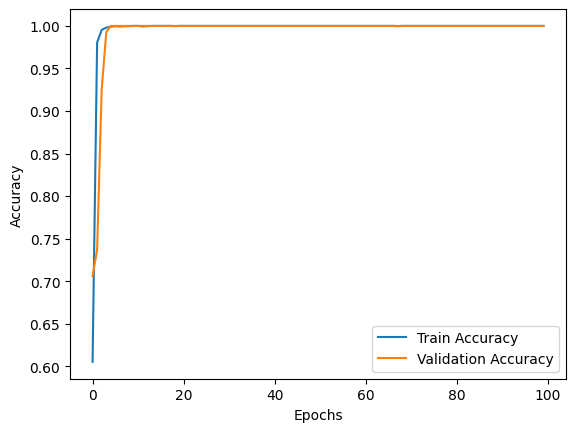

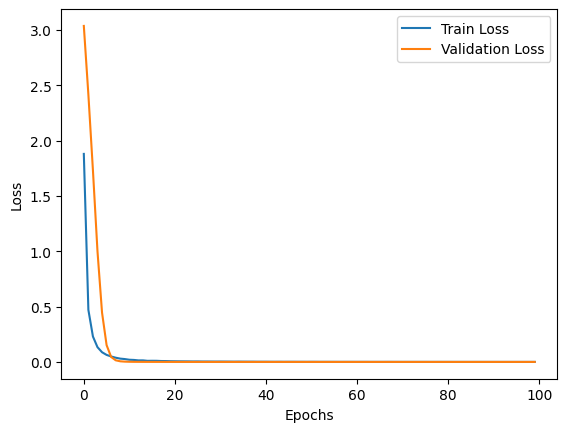

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
file_path = '/content/drive/My Drive/symptom_Description.csv'

desc = pd.read_csv(file_path, on_bad_lines='skip')


In [ ]:
desc.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [ ]:
file_path = '/content/drive/My Drive/symptom_precaution.csv'

prec = pd.read_csv(file_path, on_bad_lines='skip')


In [ ]:
prec.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [ ]:
def predd(m, X):
    # Get probabilities for each class (output from model.predict())
    proba = m.predict(X)

    # Get the indices and probabilities of the top 5 classes
    top5_idx = np.argsort(proba[0])[-5:][::-1]  # Get the top 5 indices (descending order)
    top5_proba = np.sort(proba[0])[-5:][::-1]  # Get the corresponding probabilities

    # Get the names of the top 5 diseases
    top5_diseases = y[top5_idx]  # Assuming 'y' is a list or array of disease names corresponding to class indices

    for i in range(5):
        disease = top5_diseases[i]
        probability = top5_proba[i]

        print("Disease Name: ", disease)
        print("Probability: ", probability)

        # Get the disease description if available in 'desc'
        if disease in desc["Disease"].unique():
            disp = desc[desc['Disease'] == disease]
            disp = disp.values[0][1]
            print("Disease Description: ", disp)

        # Get recommended precautions if available in 'prec'
        if disease in prec["Disease"].unique():
            c = np.where(prec['Disease'] == disease)[0][0]
            precaution_list = []
            for j in range(1, len(prec.iloc[c])):
                precaution_list.append(prec.iloc[c, j])
            print("Recommended Things to do at home: ")
            for precaution in precaution_list:
                print(precaution)

        print("\n")


In [ ]:
prec

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths
5,GERD,avoid fatty spicy food,avoid lying down after eating,maintain healthy weight,exercise
6,Chronic cholestasis,cold baths,anti itch medicine,consult doctor,eat healthy
7,hepatitis A,Consult nearest hospital,wash hands through,avoid fatty spicy food,medication
8,Osteoarthristis,acetaminophen,consult nearest hospital,follow up,salt baths
9,(vertigo) Paroymsal Positional Vertigo,lie down,avoid sudden change in body,avoid abrupt head movment,relax


In [ ]:
x=dfx.columns[1:]
x

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'weakness of one body side', 'altered sensorium',
       'nodal skin eruptions', 'red sore around nose', 'yellow crust ooze',
       'ulcers on tongue', 'spotting  urination', 'pain behind the eyes',
       'red spots over body', 'internal itching'],
      dtype='object', length=222)

In [ ]:
y

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [ ]:
import pickle

In [ ]:
import pandas as pd
from keras.models import load_model

t = pd.Series([0] * 222, index=x)
# Load the model using load_model
m = load_model("Advanced_MLP_Model.h5")
t.loc["chest_pain"] = 1
t.loc["phlegm"] = 1
t.loc["runny_nose"] = 1
t.loc["high_fever"] = 1
t.loc["throat_irritation"] = 1
t.loc["congestion"] = 1
t.loc["redness_of_eyes"] = 1
t = t.to_numpy()
print(t.shape)
t = t.reshape(1, -1)
predd(m, t)

(222,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Disease Name:  Impetigo
Probability:  0.53238666
Disease Description:  Impetigo (im-puh-TIE-go) is a common and highly contagious skin infection that mainly affects infants and children. Impetigo usually appears as red sores on the face, especially around a child's nose and mouth, and on hands and feet. The sores burst and develop honey-colored crusts.
Recommended Things to do at home: 
soak affected area in warm water
use antibiotics
remove scabs with wet compressed cloth
consult doctor


Disease Name:  Arthritis
Probability:  0.24995676
Disease Description:  Arthritis is the swelling and tenderness of one or more of your joints. The main symptoms of arthritis are joint pain and stiffness, which typically worsen with age. The most common types of arthritis are osteoarthritis and rheumatoid arthritis.
Recommended Things to do at home: 
exercise
use hot and cold therapy
try acupuncture
massage


Disease Name:  Peptic ulcer diseae
Probability